# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
# посмотрим инфо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# смотрим первые 10 строк
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


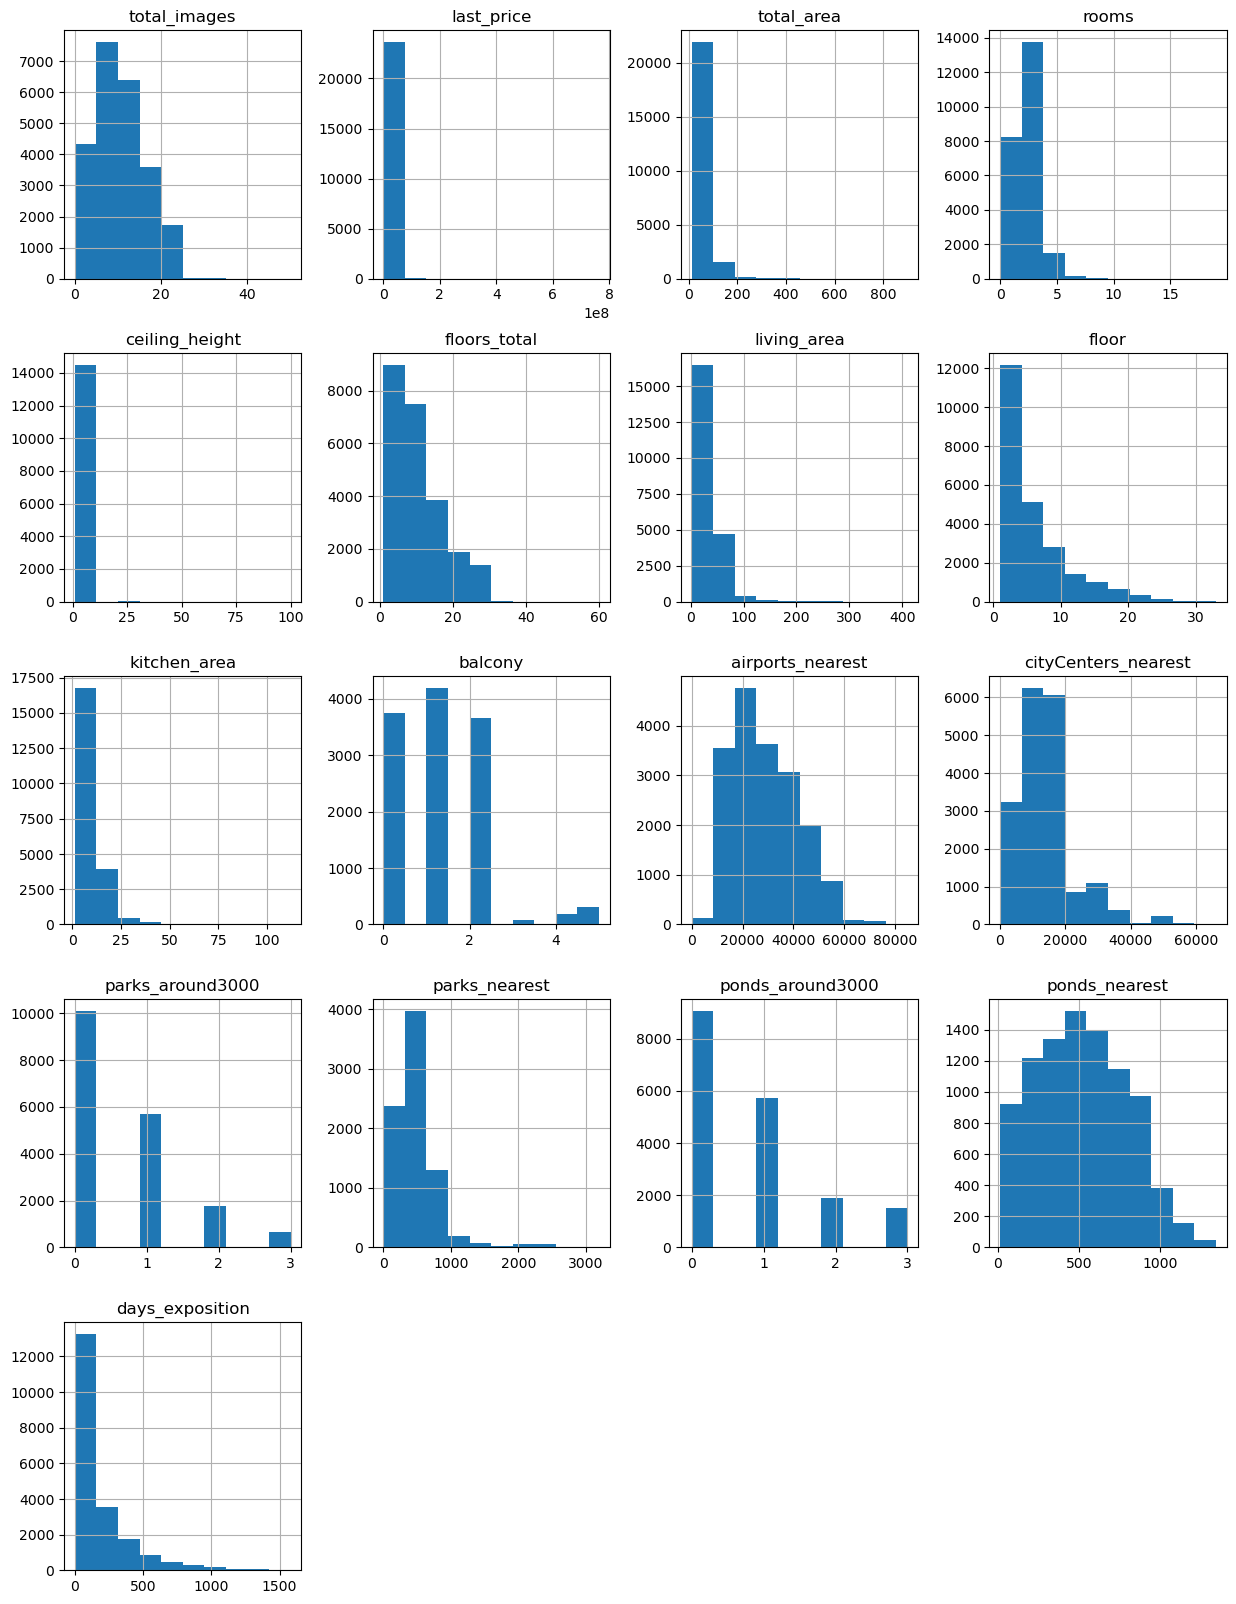

In [5]:
# строим гистораммы для датасета
data.hist(figsize=(15,20))
plt.show()

In [6]:
# Переименовываем столбцы 
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)
# Проверяем
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывод:
Прочитали файл
Необходимо изменить тип данных в столбцах.
Большое количество пропусков в большинстве столбцов. 
На основе вывода по описательным данным, cкорректировать некоторые значения.
Привели названия столбцов к единому стилю.

### Предобработка данных

ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ДАННЫХ

In [7]:
# посмотрим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски есть в 14-ти переменных из 22-x, почти 64% - достаточно много.

ceiling_height - практически в трети объявлений пропущена высота потолков, оставим пропуски.

floors_total - данные просто не заполнили, из выборки, оставим пропуски.

living_area - оставим пропуски.

is_apartment - значений, можем предположить что это не апартаменты и присвоить False.

kitchen_area - проверить не студия ли это? Если нет, то оставим пропуски.

balcony - скорее всего там нет балконов, заполняем 0

locality_name - данные просто не заполнили, оставим пропуски

airports_nearest - аэропортов рядом нет, оставляем пропуски

city_centers_nearest - центр города не близко, оставляем пропуски

parks_around3000 - значит парков нет в радиусе 3км, оставляем пропуски

parks_nearest - значит парков нет, оставляем пропуски

ponds_around3000 - значит прудов нет в радиусе 3км, оставляем пропуски

ponds_nearest - оставляем пропуски

days_exposition - объявление не было опубликовано, оставляем пропуски

In [8]:
# заменяем пропуски на False
data['is_apartment'] = data['is_apartment'].fillna('False')

In [9]:
# заменяем пропуски на 0
data['balcony'] = data['balcony'].fillna(0)

In [10]:
# Заполняем пропуски по высоте потолков медианным значением 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print('Кол-во пропущенных значений после замены -',data['ceiling_height'].isna().sum())

Кол-во пропущенных значений после замены - 0


ПРЕОБРАЗУЕМ ТИП ДАННЫХ:


Изначально мы выделили столбцы, в которых нужно преобразовать один тип данных в другой. В ходе обработки пропусков получили, что некоторые пропуски убрать не удалось => преобразовать в другой тип(int64) также не получится. Для этих случаев оставим тип float64.
Преобразуем переменную _first_dayexposition из object в формат datetime64 для дальнейшей возможности работать с ней как с датой

In [11]:
# Преобразуем переменную _first_dayexposition из object в формат datetime64 для дальнейшей возможности работать с ней как с датой
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [12]:
# преобразуем столбцы 'last_price', 'balcony' к типу данных int
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))

In [13]:
# проверяем столбцы
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

ОБРАБОТКА ДУБЛИКАТОВ

In [14]:
# проверим дубликаты и выведем их сумму
data.duplicated().sum()

0

In [15]:
# выведем уникальные значения locality_name
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
# заменяем поселок на посёлок через replace
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [17]:
# Через replace приведем к одному значению посёлок
data = data.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино'

In [18]:
# Оставим квартиры с высотой потолков не более 3.6 м.
data = data[data['ceiling_height'] <= data['ceiling_height'].quantile(0.99)]

In [19]:
# Оставим строки с этажами < 30
data = data.query('floors_total < 30 or floors_total.isna()', engine='python')

In [20]:
#data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
#data = data.query('2.5 <= ceiling_height <= 5', engine='python')

In [21]:
# 29 записей, скорее всего они образовались при замене пропущенных значений, тем не менее, их мы спользовать не будем. 
#Оставим только те данные, для которых справедливо "общая площадь" > "жилая площадь".
data.query('living_area >= total_area')[['living_area','total_area']].shape[0]
before = data.shape[0]
data = data.query('total_area > living_area')

In [22]:
# оставим объекты стоимостью не более 15 000 000 руб. 
data = data[data['last_price'] <= data['last_price'].quantile(0.99)]

In [23]:

# 19 комнат это слишком. Оставим объекты, в которых не более 5 комнат.
data = data[data['rooms'] <= data['rooms'].quantile(0.99)]

Вывод : сделали предобработку данных, а именно:
Изменили типы данных,
обработали явные и неявные дубликаты,
также обработали пропуски.

### Посчитайте и добавьте в таблицу новые столбцы

In [24]:
# Добавим столбец price_one_square_meter с ценой за кв. метр
data['price_one_square_meter'] = round(data['last_price']/data['total_area'],2)

In [25]:
# Добавим столбец exposition_weekday, exposition_month, exposition_year
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

In [26]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017
11,9,3300000,44.00,2018-08-27,2,2.65,5.0,31.00,4,False,False,False,6.00,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,75000.00,0,8,2018


Расчитаем этаж квартиры: первый, последний, другой, нет данных. Переменная _floorgroup.
Для этого напишем функцию и применим её к DataFrame при помощи метода ".apply()".

In [27]:
def change_floor(row):
    floor = row['floor']
    floors_total  = row['floors_total']
    if floors_total < 0:
        return 'нет данных'
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_group'] = data.apply(change_floor,axis=1)

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_group
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой


In [29]:
# добавим столбец city_centers_nearest_km расстояние в км до центра города
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [30]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_group,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN


Вывод:
Добавили необходимые столбцы и произвели расчеты по ним.

### Проведите исследовательский анализ данных

Изучаем параметры

In [31]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,city_centers_nearest_km
count,21211.000000,2.121100e+04,21211.000000,21211.000000,21211.000000,21160.000000,21211.000000,21211.000000,20422.000000,21211.000000,16326.000000,16344.000000,16345.000000,7107.00000,16345.000000,7996.000000,18380.000000,21211.000000,21211.000000,21211.000000,21211.000000,16344.000000
mean,9.975767,5.652682e+06,57.273947,2.011833,2.681916,10.715548,32.715125,5.912027,10.220601,0.620857,28885.446588,14486.144395,0.586907,492.28085,0.737963,526.138194,182.836834,96410.407606,2.551035,6.423931,2017.352977,14.479748
std,5.639557,3.900752e+06,25.676221,0.957169,0.179310,6.523186,16.622607,4.867930,5.065826,0.968746,12777.200565,8594.108409,0.779730,341.22956,0.915103,276.148280,219.267959,34526.277896,1.784573,3.464211,1.044738,8.601263
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.00000,0.000000,13.000000,1.000000,111.830000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,18398.250000,9797.250000,0.000000,289.00000,0.000000,307.000000,44.000000,76754.390000,1.000000,3.000000,2017.000000,10.000000
50%,10.000000,4.600000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26974.500000,13244.000000,0.000000,456.00000,0.000000,509.000000,100.000000,94618.060000,2.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.500000e+06,67.800000,3.000000,2.700000,16.000000,41.800000,8.000000,11.600000,1.000000,37434.000000,16379.500000,1.000000,613.00000,1.000000,736.000000,235.000000,112923.845000,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+07,365.000000,5.000000,3.600000,29.000000,180.000000,27.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.00000,3.000000,1344.000000,1580.000000,640422.350000,6.000000,12.000000,2019.000000,66.000000


Общая площадь - большая часть объектов недвижимости имеют площадь от 30 до 50 кв.м. Самый распространенный вариант - около 45 кв.м. Площадь объектов более 100 кв.м. встречается редко. С площадью меньше 30 кв.м. также редкость. Среднее значение - 60 кв.м.

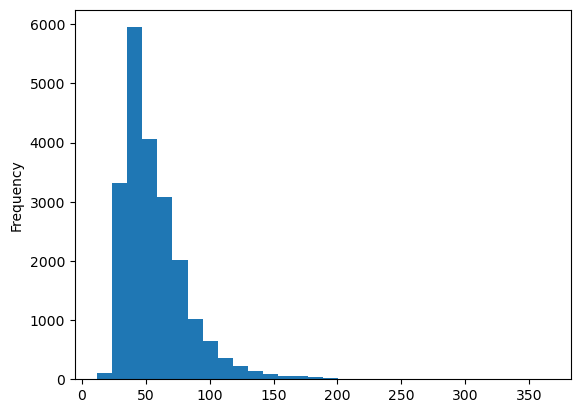

In [32]:
data['total_area'].plot(kind='hist', bins=30);

Жилая площадь - большая часть объектов недвижимости имеют жилую площадь от 15 до 30 кв.м. Самый распространенный вариант - около 15 - 20 кв.м. Жилая площадь объектов более 60 кв.м. встречается редко. С площадью меньше 15 кв.м. также редкость. Среднее значение - 34 кв.м.

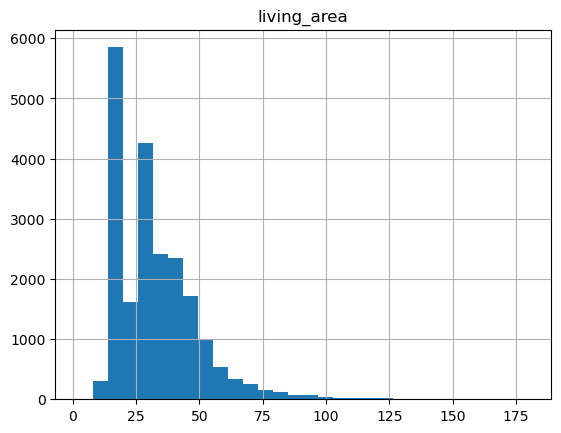

In [33]:
# living_area
data.hist('living_area', bins=30);

Площадь кухни - большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 кв.м. Самый распространенный вариант - около 5 - 10 кв.м. Площадь кухни более 13 кв.м. встречается редко. Площадь кухни менее 5 кв.м. также редкость.

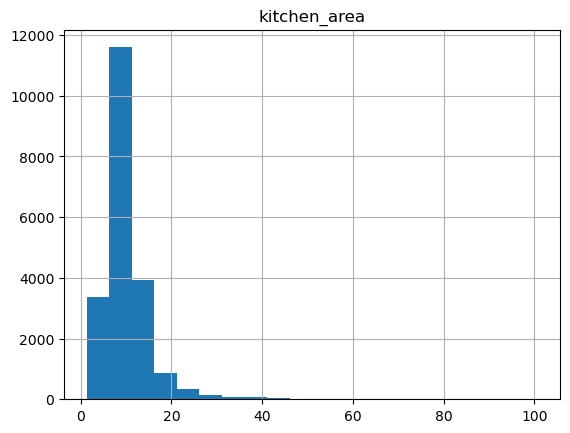

In [34]:
#kitchen_area
data.hist('kitchen_area', bins=20);

Цена объекта - большинство объектов недвижимости имеют цену в пределах от 2,5 до 5 млн. руб. Самый распространенный вариант - около 3.5 млн.руб. Вариантов с ценой более 10 млн немного.

In [35]:
data['last_price'] = data['last_price']/1e6

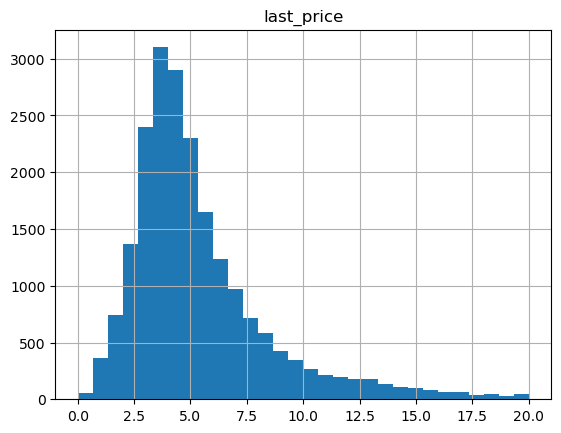

In [36]:
#last_price
data.hist('last_price', bins=30, range=(0,20));

Количество комнат - большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с 4 и 5 комнат немного. Крайне редкие значения от 6 до 19 комнат, но они не особо влияют на график. 

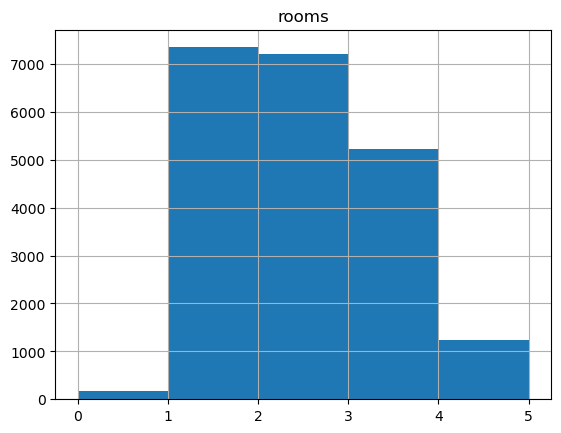

In [37]:
#rooms
data.hist('rooms', bins=5);

Высота потолков - большая часть объектов недвижимости имеют высоту потолков от 2,5 м и 2,8 м. Реже представлены варианты от 3 м.

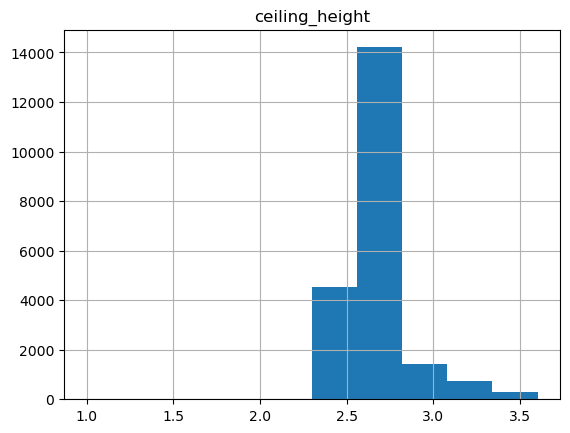

In [38]:
#ceiling_height
data.hist('ceiling_height', bins=10);

Этаж квартиры - большинство объектов недвижимости расположены с 1 по 6 этаж. Реже представлены варианты с 6 по 10. от 15 этажа минимальное кол-во квартир.

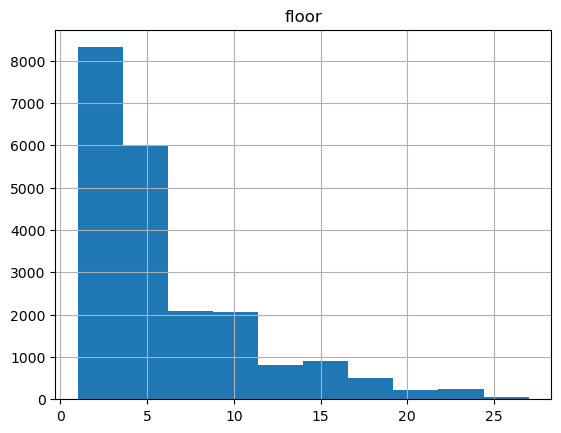

In [39]:
#floor
data.hist('floor', bins=10);

Тип этажа квартиры («первый», «последний», «другой»)в этом случае используем тип bar;
Больше всего квартир на "другом" этаже и это логично. Первых и последних этажей одинакого мало.

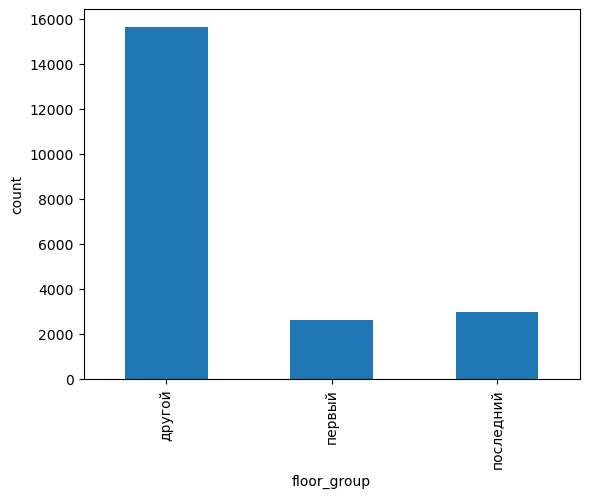

In [40]:
#floor_group
data.groupby(by='floor_group')['floor_group'].count().plot(kind='bar', ylabel = 'count');


Общее количество этажей в доме - большинство объектов недвижимости это 5-ти , 9-ти этажки.

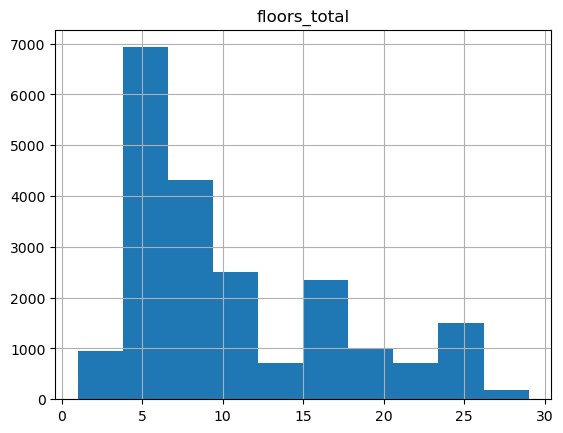

In [41]:
#floors_total
data.hist('floors_total',bins=10);

Расстояние до центра города в метрах - большинство объектов недвижимости расположены на удалении 10-16 км от центра.

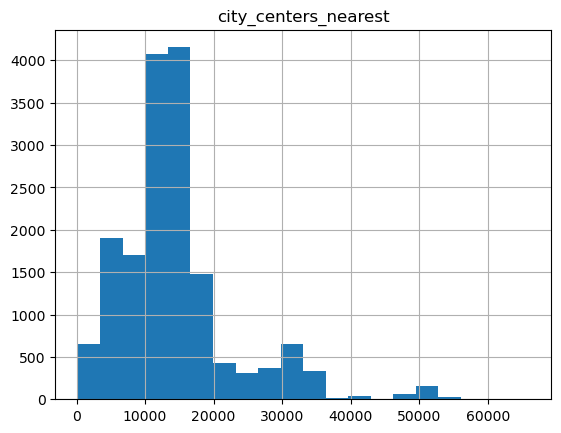

In [42]:
#city_centers_nearest
data.hist('city_centers_nearest', bins=20);

Расстояние до ближайшего аэропорта - большинство объектов расположены на удалении от аэропорта на расстоянии 15-25 км.

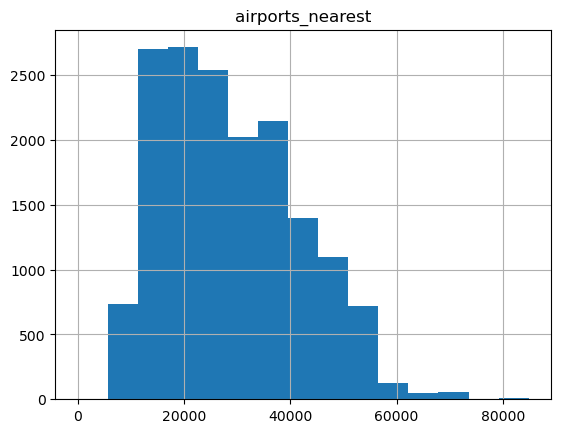

In [43]:
#airports_nearest
data.hist('airports_nearest', bins=15);

Расстояние до ближайшего парка - большинство объектов расположены на удалении от ближайшего парка на расстоянии 400-600м. 

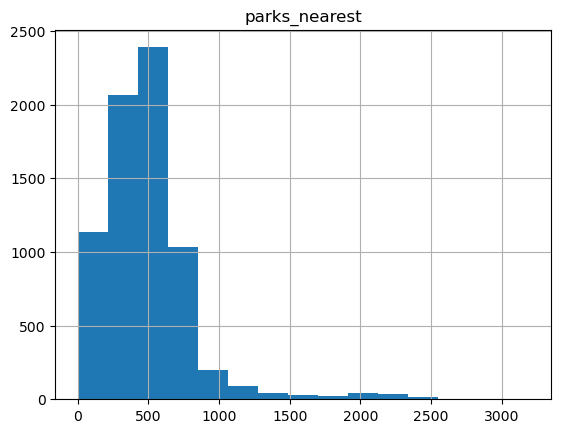

In [44]:
#parks_nearest
data.hist('parks_nearest', bins=15);

День и месяц публикации объявления - Чаще всего объявления публиковали в будние дни, реже в выходные.
По графику видно, что чаще всего объявления публиковали после январских праздников, в феврале по март. Наименьшие показатели в январе, мае и июне. Могу предположить, что из-за праздников и начала дачного сезона.


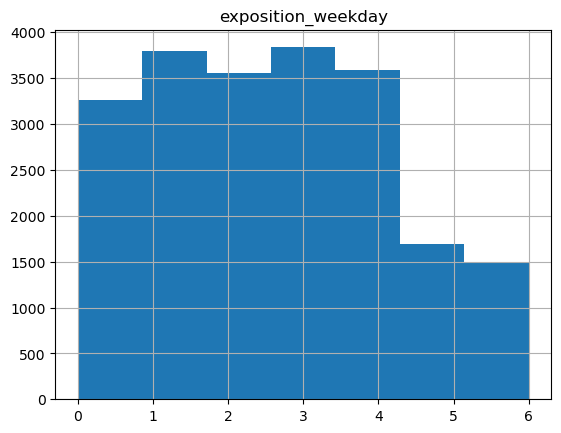

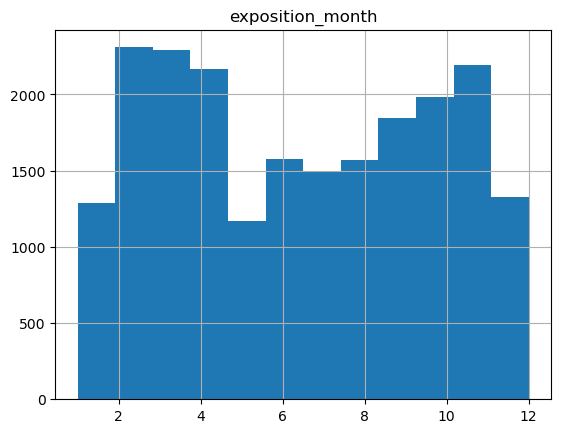

In [45]:
#exposition_weekday
#exposition_month
data.hist('exposition_weekday', bins=7);
data.hist('exposition_month', bins=12);

Вывод: Мы получили представление о типичном объекте недвижимости из исходных данных: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 6 этаж), общей площадью от 30 до 50 кв.м, площадью кухни около от 5,5 до 12 кв.м, с высотой потолков от 2,5 м и 2,8 м, стоимостью от 2,5 до 5 млн. руб, расположенной на удалении от центра на расстоянии 10000-16000 метров, от аэропорта на расстоянии 15000-25000 м, до ближайшего парка 400 - 600 метров.

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

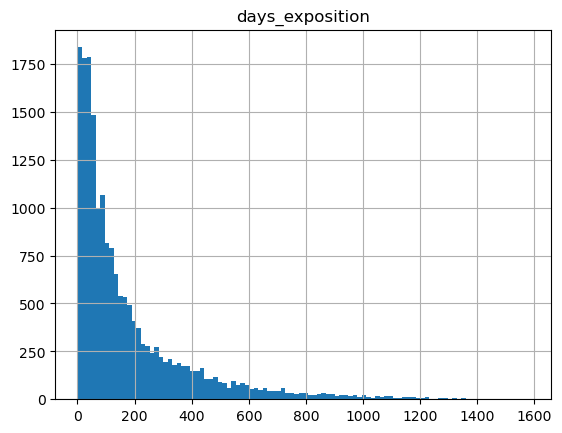

In [46]:
data.hist('days_exposition', bins=100);

In [47]:
data['days_exposition'].mean()

182.83683351468989

In [48]:
data['days_exposition'].median()

100.0

Вывод: Среднее время продажи объекта недвижимости 182 день, медианное - 100 дней. Квартиры в среднем продаются окоо трех месяцев. Так же у нас есть "длинный хвост" - это квартиры которые продаются годами. Я думаю быстрые продажи до 100 дней, а необычно долгими - свыше 182 дня.

"Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

In [49]:
# вывели названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_one_square_meter',
       'exposition_weekday', 'exposition_month', 'exposition_year',
       'floor_group', 'city_centers_nearest_km'],
      dtype='object')

In [50]:
# Создадим список с параметрами для проверки
corr_fakt = [
    'last_price',
    'total_area',
    'rooms',
    'city_centers_nearest',
    'exposition_weekday',
    'exposition_month',
    'exposition_year']

In [51]:
# Список с названиями параметров
corr_fakt_rus = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
    'публикация объявления\nдень',
    'публикация объявления\nмесяц',
    'публикация объявления\nгод']

# Получаем матрицу корреляции
corr_matrix = data[corr_fakt].corr()
# Выведем на экран
display(corr_matrix)

,last_price,total_area,rooms,city_centers_nearest,exposition_weekday,exposition_month,exposition_year
last_price,1.000000,0.787806,0.492995,-0.333245,-0.016379,0.001534,-0.041106
total_area,0.787806,1.000000,0.776903,-0.206321,-0.011324,0.007751,-0.088160
rooms,0.492995,0.776903,1.000000,-0.145123,-0.002023,-0.000830,-0.052410
city_centers_nearest,-0.333245,-0.206321,-0.145123,1.000000,0.009838,-0.012175,0.024701
exposition_weekday,-0.016379,-0.011324,-0.002023,0.009838,1.000000,0.011509,-0.008133
exposition_month,0.001534,0.007751,-0.000830,-0.012175,0.011509,1.000000,-0.255721
exposition_year,-0.041106,-0.088160,-0.052410,0.024701,-0.008133,-0.255721,1.000000


<Axes: xlabel='last_price', ylabel='kitchen_area'>

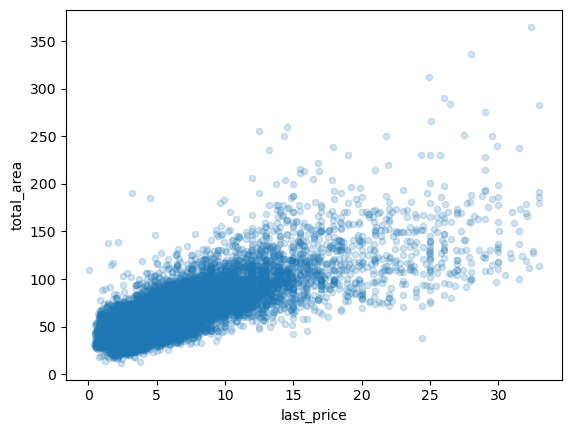

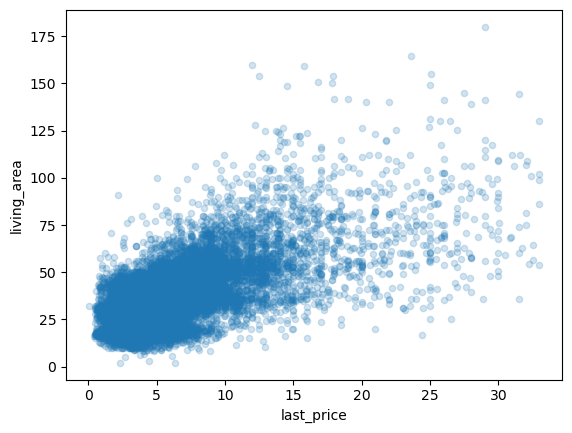

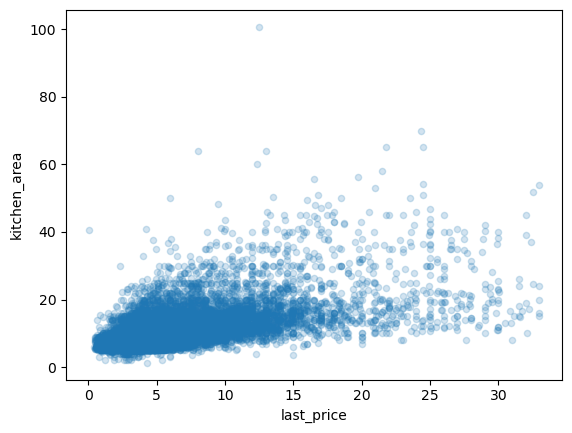

In [52]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)

Из графиках видно, что зависимость прямопропорциональная - чем больше площадь, тем выше ее стоимость.

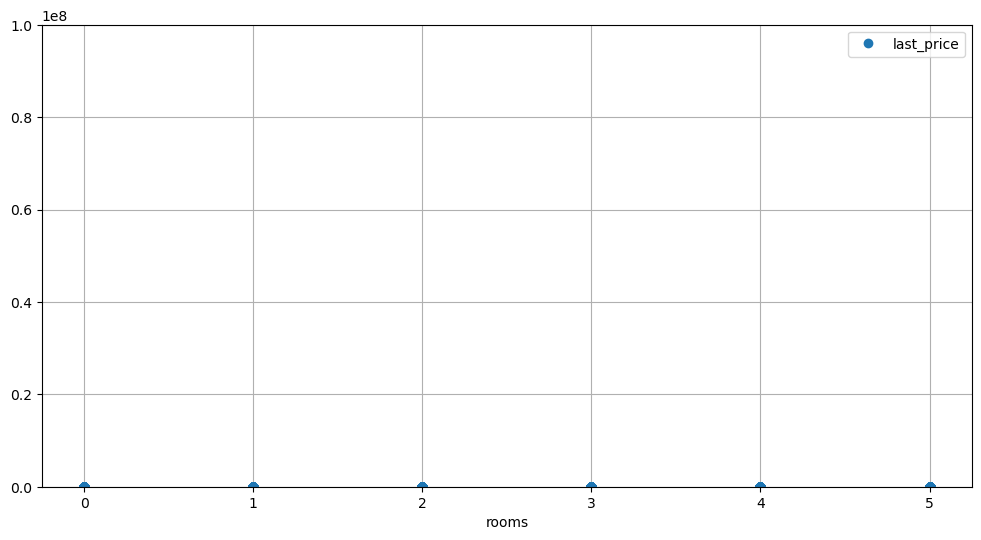

In [53]:
data.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6))
plt.ylim(0, 100000000)
plt.show()

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб и кол-вом комнат от 1 до 3. Для этого диапазона: с учеличение числа комнат до 3 комнат стоимость квартир растет, от 3 до 4 - цена примерно одинаковая, для 5 комнат стоимость снижается. Это можно объяснить тем, что в старом фонде есть 5-ти комнатные квартиры с маленькой площадью комнат.

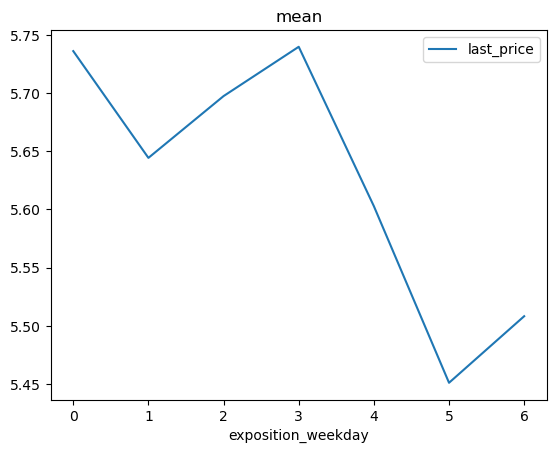

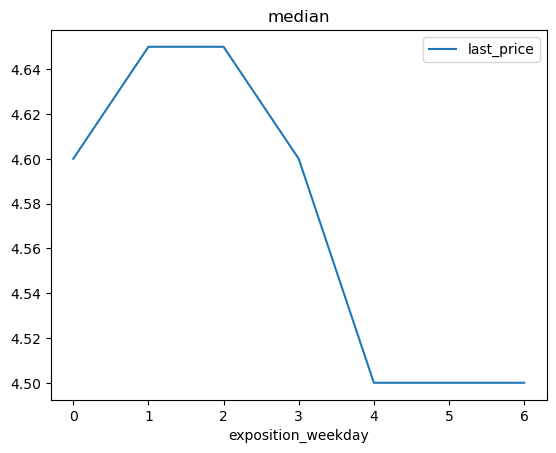

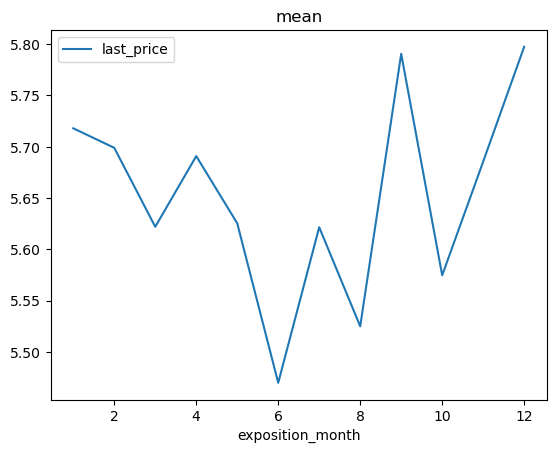

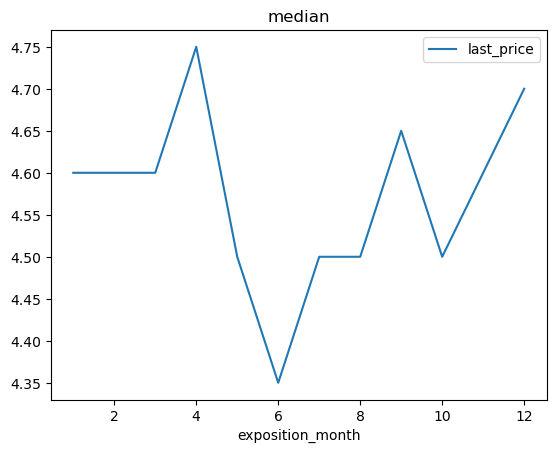

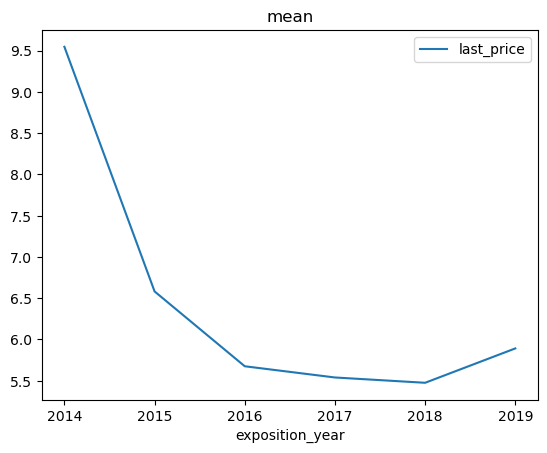

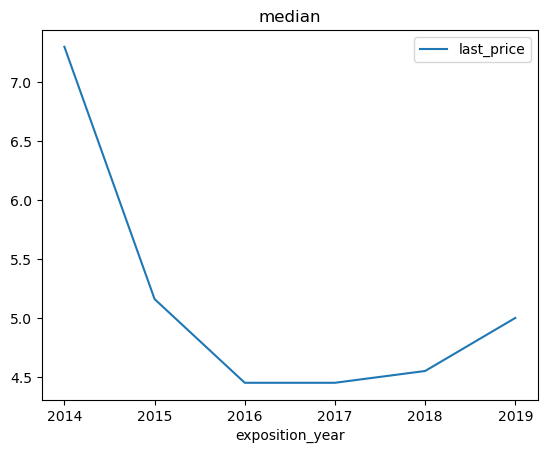

In [54]:
data.pivot_table(index='exposition_weekday',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='exposition_weekday',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='exposition_month',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='exposition_month',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='exposition_year',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='exposition_year',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует.

,mean,count,median
floor_group,,,
другой,5.892487,15638,4.79
первый,4.482786,2599,3.90
последний,5.414110,2974,4.25


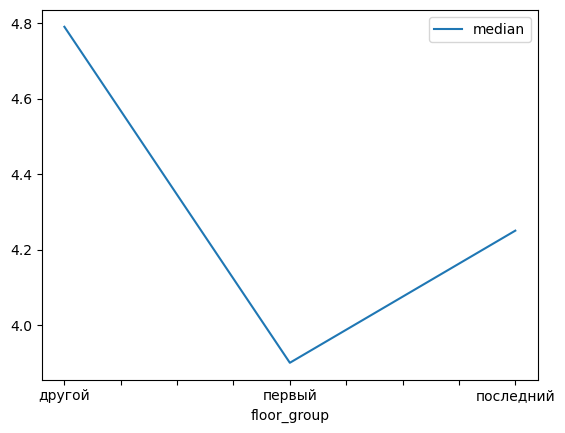

In [55]:
# Создаем сводную таблицу
pivot_table_floor = data.pivot_table(index = 'floor_group', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_floor.plot(y = 'median', legend=True)
#Выводим
pivot_table_floor

Медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир - для квартир отличных от первого и последнего этажа.

Вывод: На общую (полную) стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет.

"Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [56]:
#10 населенных пунктов с большим количеством объявлений 
top_10_localities = data['locality_name'].value_counts().head(10)
top_10_localities

Санкт-Петербург      14037
посёлок Мурино         521
Кудрово                424
посёлок Шушары         403
Всеволожск             370
Пушкин                 337
Колпино                327
посёлок Парголово      301
Гатчина                290
Петергоф               197
Name: locality_name, dtype: int64

In [57]:
# Выведем среднюю цену за кв.м по 10 населенным пунктам
top_10_localities_pivot = data.query('locality_name in @top_10_localities.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10_localities_pivot.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,110072.540102
Пушкин,102976.900356
Кудрово,95716.020967
посёлок Парголово,90442.586645
посёлок Мурино,86627.243820
Петергоф,84480.969848
посёлок Шушары,78862.667990
Колпино,75249.775443
Всеволожск,68828.271351


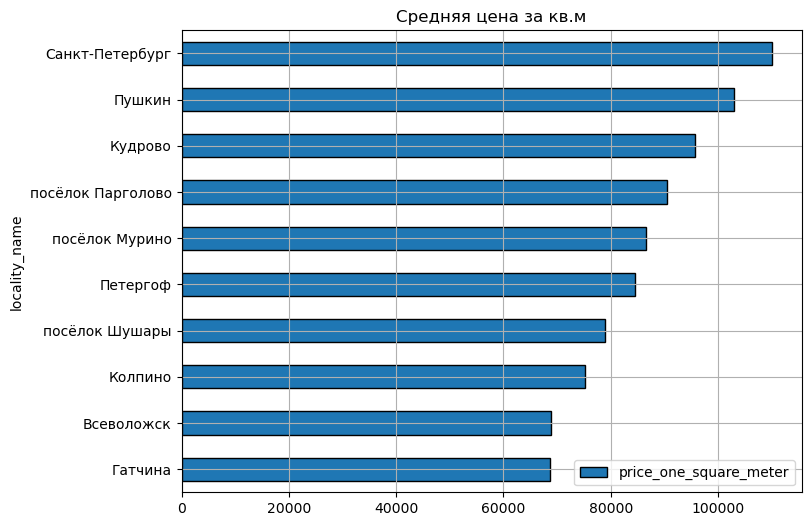

In [58]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

top_10_localities_pivot.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))
plt.title('Средняя цена за кв.м')
plt.show()

Вывод: Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(110072 руб.), что логично. Следом по стоимости идет Пушкин(102976 руб.), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина (68695 руб.)

"Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [59]:
# выберем только Санкт-Петербург
df_spb = data.query('locality_name == "Санкт-Петербург"')
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_group,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
2,10,5.196,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5.400,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5.050,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0


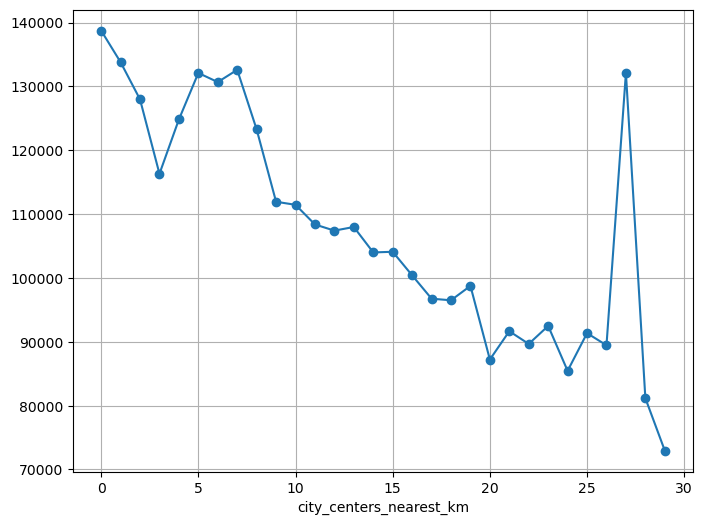

In [60]:
# Рассчитаем среднюю цену квадратного метра до центра
(
df_spb
    .pivot_table(index='city_centers_nearest_km', values='price_one_square_meter')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.show()

Вывод: Можно заметить, что после 8 км стоимость начинается уменьшаться. Максимальная стоимость у самого центра(до 1 км). Пик в районе 27 км - возможено там новое элитное жилье.

### Общий вывод

Проведен анализ данных сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Типичное объявление о продаже квартиры имеет вид: 1-3 -х комнатные квартира общей площадью от 30 до 50 кв.м. с высотой потолков от 2,5 м и 2,8 м. стоимостью ~ 110072 руб. за кв.м в Санкт - Петербурге. 

Стоимость квартиры в большей степени зависит от её расположения (ближе - дальше к центру города Санкт-Петербург), чем ближе к центру - квартира дороже. Но есть и дорогое элитное жилье в новостройках, которое находится отдаленно от центра города.
Цена так же зависит от этажа, дороже те, которые располагаются в середине (не первый и не последний этажи). От площади кухни, большие кухни "в цене". Наличие поблизости парков и водоемов скорее в "+" к цене квартиры, но совсем не значительно.

В меньшей степи на цене сказываются: наличие аэропорта вблизи скорее отрицательно влияет на стоимости квартиры или не играет роли вовсе. Наличие/отсутствие балконов и их число не играют роли, также как и высота потолков, планировка(свободная или нет).

Безусловно ещё играет роль и общая ситуация в стране, на рынке недвижимости в год продажи. В основном, на продажу квартиры уходит 3-4 месяца.